In [1]:
# %% Imports
import sys
sys.path.append("../")
import os

import numpy as np
from tensorflow import keras
import tensorflow as tf
import matplotlib.pyplot as plt
import tensorflow_datasets as tfds
from sklearn.metrics import *

from oodeel.eval.metrics import bench_metrics, get_curve
from oodeel.datasets import DataHandler
from oodeel.methods.residual import Residual

In [2]:
# %% load data
def normalize(x):
    return x/255
    
data_handler = DataHandler()
ds1 = data_handler.load_tfds('mnist', preprocess=True, preprocessing_fun=normalize)
ds2 = data_handler.load_tfds('fashion_mnist', preprocess=True, preprocessing_fun=normalize)

x_id = ds1["test"]
x_ood = ds2["test"]
x_train = ds1["train"]

x_test = data_handler.merge_tfds(x_id, x_ood, shuffle=False)


2022-11-22 14:34:27.814185: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /opt/software/slurm/lib64
2022-11-22 14:34:27.814267: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-11-22 14:34:27.814334: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (ul-val-pr-cpu70.l.ul.ca): /proc/driver/nvidia/version does not exist
2022-11-22 14:34:27.815083: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-11-22 14:34:28.189604: W tensorflow/core/kernels/d

In [3]:
# %% load model
model = tf.keras.models.load_model("../saved_models/mnist_model")



2022-11-22 14:34:29.596815: W tensorflow/core/kernels/data/cache_dataset_ops.cc:856] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


235/235 [==============================] - 17s 70ms/step


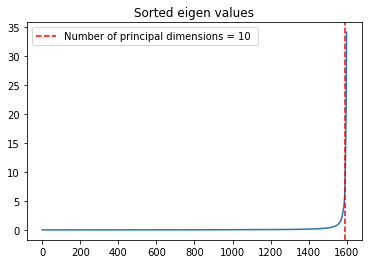

In [4]:
# %% Apply OOD method residual (specify number of principal dimensions)

oodmodel = Residual(princ_dims=10)
oodmodel.fit(model, x_train)
oodmodel.plot_spectrum()            



In [7]:
# %% Get scores
scores = oodmodel.score(x_test)
labels = data_handler.get_ood_labels(x_test)


fpr, tpr = get_curve(scores, labels)

metrics = bench_metrics(
    scores, labels, 
    metrics = ["auroc", "fpr95tpr", accuracy_score, roc_auc_score], 
    threshold = -5,
    step=1

    )

print(metrics)

79/79 [==============================] - 5s 66ms/step
{'auroc': 0.734025765, 'fpr95tpr': 0.7397, 'accuracy_score': 0.5, 'roc_auc_score': 0.734025765}


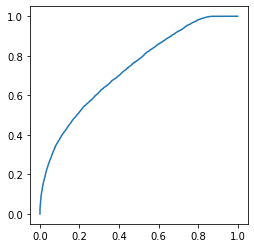

In [9]:
# %% plot ROC curve
fig, ax=plt.subplots()
plt.plot(fpr, tpr)
ax.set_aspect("equal")
plt.show()


235/235 [==============================] - 14s 60ms/step


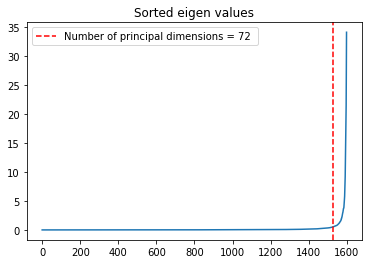

In [10]:
# %% Apply OOD method residual (specify number ratio of explained variance)

oodmodel = Residual(princ_dims=0.8)
oodmodel.fit(model, x_train)
oodmodel.plot_spectrum()            



In [11]:
# %% Get scores
scores = oodmodel.score(x_test)
labels = data_handler.get_ood_labels(x_test)


fpr, tpr = get_curve(scores, labels)

metrics = bench_metrics(
    scores, labels, 
    metrics = ["auroc", "fpr95tpr", accuracy_score, roc_auc_score], 
    threshold = -5,
    step=1

    )

print(metrics)

79/79 [==============================] - 5s 65ms/step
{'auroc': 0.734025765, 'fpr95tpr': 0.7397, 'accuracy_score': 0.5, 'roc_auc_score': 0.734025765}


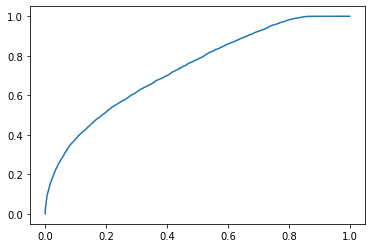

In [12]:
# %% plot ROC curve
fig, ax=plt.subplots()
plt.plot(fpr, tpr)
ax.set_aspect("equal")
plt.show()

235/235 [==============================] - 14s 59ms/step
Found an elbow point for 52 principal dimensions inside the 1600 dimensional feature space.
It is assumed that spectrum is convex to find this number with the kneedle algorithm, please verify!
You can visualize this elbow by calling the method '.plot_spectrum()' of this class


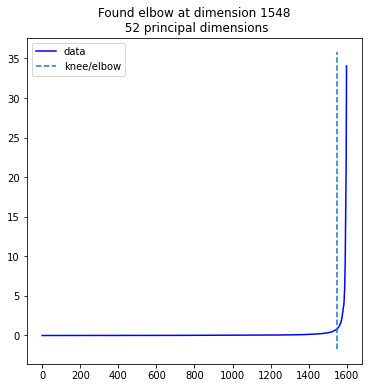

In [16]:
# %% Apply OOD method residual (use kneedle to find number of principal dimensions)
oodmodel = Residual()
oodmodel.fit(model, x_train)
oodmodel.plot_spectrum()        

In [19]:
# %% Get scores 
scores = oodmodel.score(x_test)
labels = data_handler.get_ood_labels(x_test)

fpr, tpr = get_curve(scores, labels)

metrics = bench_metrics(
    scores, labels, 
    metrics = ["auroc", "fpr95tpr", accuracy_score, roc_auc_score], 
    threshold = -5,
    step=1

    )

print(metrics)

79/79 [==============================] - 5s 66ms/step
{'auroc': 0.7140356, 'fpr95tpr': 0.7322, 'accuracy_score': 0.5, 'roc_auc_score': 0.7140356000000001}


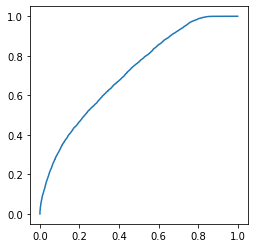

In [20]:
# %% plot ROC curve
fig, ax=plt.subplots()
plt.plot(fpr, tpr)
ax.set_aspect("equal")
plt.show()